In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download data from       
https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

In [2]:
weather = pd.read_csv('weather.csv', index_col="DATE")

first column is a date column and it is going to be as our index 

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row is single day and the columns are different weather measurements from that day.     
PRCP - Precipitation - how much rain fell that day      
SNOW - how much snow     
SNWD - snow depth - how much snow on the ground      
TMAX - Max temp (F in US)    
TMIN - Min Temp   
There is a data dictionary     
https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19287 non-null  object 
 1   NAME     19287 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14171 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19287 non-null  float64
 8   SNOW     19287 non-null  float64
 9   SNWD     19285 non-null  float64
 10  TAVG     6164 non-null   float64
 11  TMAX     19287 non-null  int64  
 12  TMIN     19287 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9669 non-null   float64
 16  WDF5     9586 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [5]:
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
ACMH        9672
ACSH        9671
AWND        5116
FMTM        9163
PGTM        7018
PRCP           0
SNOW           0
SNWD           2
TAVG       13123
TMAX           0
TMIN           0
TSUN       19256
WDF1        9676
WDF2        9618
WDF5        9701
WDFG       14166
WDFM       19286
WESD       13216
WSF1        9673
WSF2        9618
WSF5        9702
WSFG       11824
WSFM       19286
WT01       12155
WT02       18034
WT03       18000
WT04       18951
WT05       18923
WT06       19106
WT07       19179
WT08       15371
WT09       19147
WT11       19273
WT13       17102
WT14       18400
WT15       19245
WT16       12710
WT17       19227
WT18       18120
WT21       19282
WT22       19238
WV01       19286
dtype: int64

We need to remove the null values.     
Calculate the null percentagee

In [6]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [7]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

columns that have less than 5% of null values

In [8]:
valid_columns = weather.columns[null_pct < 0.05]

In [9]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

When you assign a data frame a slice of a data frame back to itself, use dot copy otherwise you'll get a copy warning later

In [10]:
weather = weather[valid_columns].copy()

change column names to lower case

In [11]:
weather.columns = weather.columns.str.lower()

In [12]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21


fill the null values     
fill in the next missing value with the last non-missing value

In [13]:
weather = weather.ffill()

In [14]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

Ensure the data types are the correct data types     

In [15]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

index is stored as an object but should be a date

In [16]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [17]:
weather.index = pd.to_datetime(weather.index)

In [18]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [19]:
weather.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=19287)

In [20]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

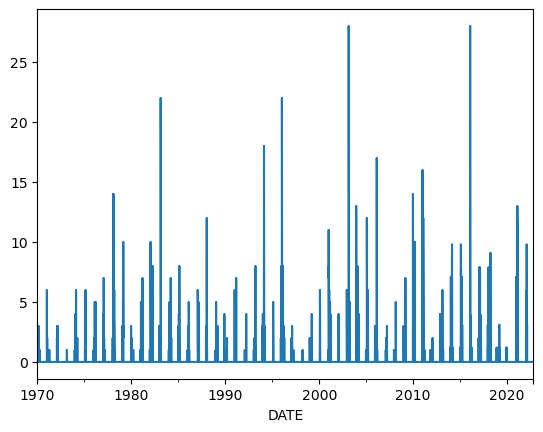

In [21]:
weather["snwd"].plot()

We're trying to predict tomorrow's temperature     
Couple of column indicate the temperature, T-Max is in Fahrenheit (Max Temp) and T-Min is minimum temperature of that day     
Create a target column     


In [22]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [23]:
weather['target'] = weather.shift(-1)["tmax"]

In [24]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


tmax shifted to previous row targe column     
i.e, jan 02, 1970 Tmax is same as Jan 01, 1970 target   
we are trying to predict tomorrow temperature     
last row target will be a NaN     
we use ffill again

In [25]:
weather = weather.ffill()

In [26]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [27]:
# conda install scikit-learn
from sklearn.linear_model import Ridge

In [28]:
weather.corr()

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
snow,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
snwd,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
tmax,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
tmin,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


check for colinearity  
find the correlations between the various columns   
precipitation (precp) is uncorrelated from most of the columns slightly correlated to snow          
Tmax and Tmin are pretty correlated which makes sense and the target is correlated to Tmax and Tmin     
Tomorrow's temperature is correlated to today's temperature      


Ridge regression model works similar to linear regression except it penalizes coefficients to account for multi-collinearity    
If you are using a regular linear regression you would have to worry about it a little bit more      
There is a keyword lamda in ridge regression but cannot use with python as it is python keyword (alpha is used instead)     
Alpha parameter controls how much the coefficients are shrunk to account for collinearity so you can experiment with setting this to different values 0.1 is a good default value.   

In [29]:
rr = Ridge(alpha=.1)

So we initialize our ridge regression model and now we need to apply the ridge regression model so to do that we need to do two things. first thing, we need to do is create a list of predictor columns so these are the columns that we're going to use to prdict our target       
and to get that we're going to again index our list of columns and this time we're going to say is we want all of the columns except a few of them so we're going to say except the columns that are in this list 

In [30]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [31]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

We have time series data, todays temp is closely linked to yesterday.      
Typically when you try to estimate the error of a machine learning model you can use cross-validataion except with time series data . With time series data we need to be really careful not to use future data to predict the past so we need to actually use a special technique called back testing or time series cross-validataion to account for the time series nature of the data.    
       
A function called backtest and this function is going to take in our weather dataframe, ridge regression model,  list of predictors      
It is also take a start parameter, that indicate how much data we want to take, 10 years of data before we start making predictions and then we're going to define a step, this means that every 90 days we'll create a set of predictions and then move on to the next 90 days and then the next 90 days so this is going to generate predictions for our entire set of data except the first 10 years so we're going to have predictions from 1980 


In [32]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions =[]
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step), :]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["target"], preds], axis=1)
        
        combined.columns = ["actual", "prediction"]
        
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions, axis=0)

Create a "all_predictions" list and that will contain a data frame of 90 days predictions.      

For loop, start with start parameter which is 3650, up to weather.shape[0] which is the end of our data set and advance 90 each time (step).     
     
Each iteration we're going to create a training set so the training set is the data we use to train our ML model and this is going to be all of the rows in our data up to row i      
      
then test set, which is i + i step     
     
Train - this is going to take all of the data that comes before the current row to use as our training data and 
test  - this is going to take the next 90 days to make predictions on      
     
Then fit our model and pass in our predictors which we use to make our judgements and then we're going to pass in our target and the target is what we are trying to predict.                
     
preds returns a numpy array and we convert them into pandas series and index is same as test data     
     
concatenate our real test data in with our predictions, axis=1 which means treat each of these as a separate column in a single data frame.     
      
name the columns and create a column called "diff" and take the absolute value of that    
    
Each time we go through loop, we generate predictions for 90 days and add those predictions to the list and then at the very end return all of those predictions in one long data frame.     
     
default axis=0 that means treat everything like separate rows

In [33]:
predictions = backtest(weather, rr, predictors)

In [34]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.13932667966084

In [36]:
predictions["diff"].mean()

5.139326679660817

This means on an average we are 5 degrees off from the correct temperature.      
This is not great and could be improved.        
Calculate the average temp and precipitation in the past three days and past 14 days and looking at how the current day compares to those days  

In [37]:
def pct_diff(old, new):
    return (new - old) / old

In [38]:
# format string introduced in 3.9 or 3.10
# col is TMax
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling mean - take the last few rows before a current row and compute the average of a column across all those rows     
Jan 5th 5 day rolling mean for TMax, we look at 5 days prior and get the average max temp.      

In [39]:
# run this for 3day horizon and 14 day orizon
rolling_horizons = [3,14]

for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [40]:
# this will add new columns
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,6.666667e-03,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,6.666667e-03,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,6.666667e-03,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,2.666667e-02,2.0,67.142857,-0.002128,50.785714,0.063291,0.233571,-0.657492
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,2.666667e-02,-1.0,67.285714,-0.138004,50.857143,-0.056180,0.135000,-1.000000
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,67.000000,-0.164179,50.000000,-0.140000,0.095714,-1.000000


In [41]:
# there will be NaNs because no previous values for 3 and 14 days.
# remove those 14 days
weather = weather.iloc[14:, :]

In [42]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000e+00,NaN,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000e+00,NaN,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,6.666667e-03,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,4.000000e-02,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,4.000000e-02,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,2.666667e-02,2.0,67.142857,-0.002128,50.785714,0.063291,0.233571,-0.657492
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,2.666667e-02,-1.0,67.285714,-0.138004,50.857143,-0.056180,0.135000,-1.000000
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,67.000000,-0.164179,50.000000,-0.140000,0.095714,-1.000000


In [43]:
# Still there are couple of NaNs due dividing by zero or diving zero
weather = weather.fillna(0)

In [45]:
# function to expand mean = take our data frame as input, take a look at each row and take all previous rows 
# and return the mean of all those rows together
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

for loop through each column in the list of  ["tmax", "tmin", "prcp"]     
and create two new columns, average for a given month     
take the weather(col) and group it by weather.index.month     
group_key=False - make the output clean and not include another level to the index.      
an d apply this function expand mean 

what we are doing is get the average for the month from the previous records for those month

Second column, is for  that day of that year     
and this will create 6 new columns

In [46]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,...,50.785714,0.063291,0.233571,-0.657492,64.843462,63.490566,50.225905,48.962264,0.115316,0.114151
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,...,50.857143,-0.056180,0.135000,-1.000000,64.839264,63.962264,50.224540,48.943396,0.115245,0.077170
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,50.000000,-0.140000,0.095714,-1.000000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547


Now that we have our new predictors, we can re-run our model

In [50]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

This should include the new columns

In [51]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [52]:
predictions = backtest(weather, rr, predictors)

In [53]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.7895196391438155

In [54]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.393216,30.606784
1998-03-26,80.0,51.960174,28.039826
2007-03-26,78.0,49.972150,28.027850
2003-04-15,86.0,59.412927,26.587073
1985-04-18,84.0,58.323966,25.676034
...,...,...,...
1984-04-23,55.0,54.998397,0.001603
1985-07-05,80.0,79.998678,0.001322
2016-06-29,85.0,84.999142,0.000858


Biggest on top    


In [57]:
weather.loc["1990-03-07":"1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


Mar 12th and prior and after temperatures

In [59]:
predictions["diff"].round().value_counts().sort_index()

0.0     1130
1.0     2164
2.0     1995
3.0     1857
4.0     1580
5.0     1389
6.0     1158
7.0      996
8.0      814
9.0      677
10.0     514
11.0     363
12.0     312
13.0     189
14.0     145
15.0      97
16.0      79
17.0      52
18.0      36
19.0      20
20.0      15
21.0      13
22.0      11
23.0       8
24.0       3
25.0       1
26.0       1
27.0       1
28.0       2
31.0       1
Name: diff, dtype: int64

<AxesSubplot:>

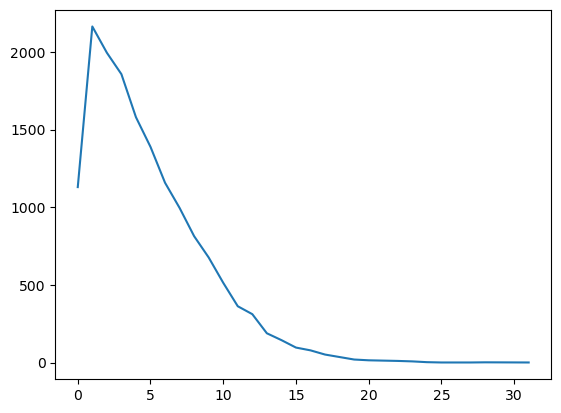

In [60]:
predictions["diff"].round().value_counts().sort_index().plot()